In [78]:
import numpy as np
from scipy import optimize
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 14.0

In [79]:
data = np.load('timeseries.npy')
t = data[:9000, 0]
y = data[:9000, 1]

# Time series analysis
Next, we'll do some analysis on the generated time serie(s) using available functions in `scipy` and `numpy`.

### moving average

In [80]:
def simple_moving_average(y, N):
    y_padded = np.r_[np.repeat(y[0], N), y]
    cs = np.cumsum(y_padded)
    return (cs[N:] - cs[:-N]) / N

def centered_moving_average(y, N):
    y_padded = np.r_[np.repeat(y[0], (N+1)//2), y, np.repeat(y[-1], N//2)]
    cs = np.cumsum(y_padded)
    return (cs[N:] - cs[:-N]) / N

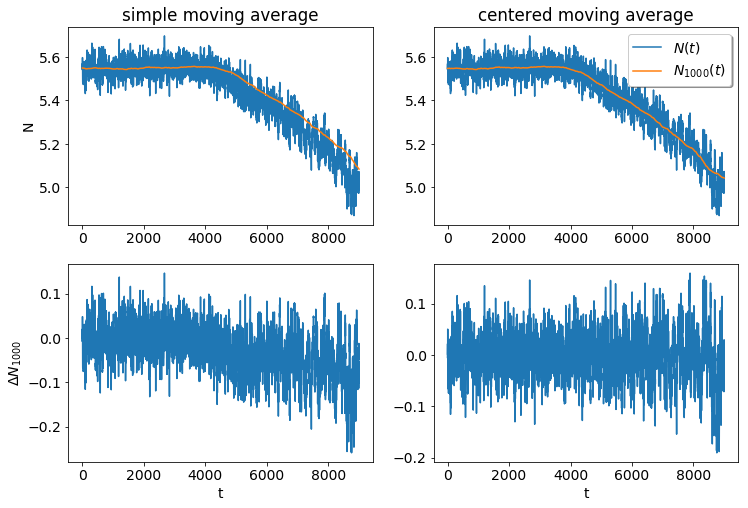

In [81]:
y_sma_10 = simple_moving_average(y, 1001)
y_cma_10 = centered_moving_average(y, 1001)

fig1 = plt.subplot(221)
fig1.plot(t, y)
fig1.plot(t, y_sma_10)
fig1.set_ylabel('N')
fig1.set_title('simple moving average')

fig2 = plt.subplot(223)
fig2.plot(t, y - y_sma_10)
fig2.set_xlabel('t')
fig2.set_ylabel('$\Delta N_{1000}$')

fig3 = plt.subplot(222)
fig3.plot(t, y, label='$N(t)$')
fig3.plot(t, y_cma_10, label='$N_{1000}(t)$')
fig3.set_title('centered moving average')
fig3.legend(loc='upper right', shadow=True)

fig4 = plt.subplot(224)
fig4.plot(t, y - y_cma_10)
fig4.set_xlabel('t')

plt.savefig('figures/moving_average.svg')
plt.show()

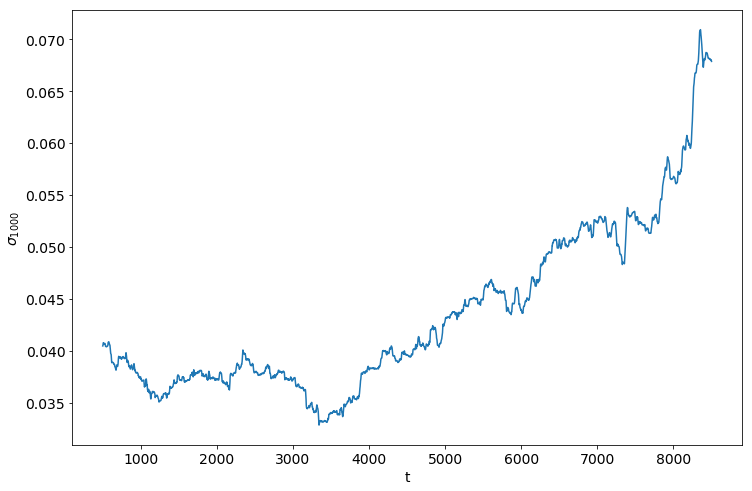

In [82]:
# compute moving std
res = y - y_cma_10
n_window = 1000

idx = np.arange(n_window)[None,:] + np.arange(len(t) - n_window)[:, None]
stds = res[idx].std(axis=1)

fig = plt.subplot(111)
fig.plot(t[n_window//2:-n_window//2], stds)
fig.set_xlabel('t')
fig.set_ylabel('$\sigma_{1000}$')
plt.show()